In [41]:
from keras.layers import Dense, Input, Lambda, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [42]:
image_size=[224,224]

data= 'animals'


data=ImageDataGenerator().flow_from_directory(data, classes=['cats', 'dogs', 'panda'], target_size=(224,224), batch_size=20, class_mode='categorical')

Found 3000 images belonging to 3 classes.


In [43]:
vgg=VGG16(input_shape=image_size+[3],include_top=False)
model=Sequential()
for layer in vgg.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable=False

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [45]:
model.add(Flatten())
model.add(Dense(3, activation='softmax')) 

In [46]:
from keras.optimizers import Adam

In [47]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
r=model.fit_generator(data, validation_steps=10, epochs=5, steps_per_epoch=10)

### REQUIRES GPU & LOT OF TIME

Epoch 1/5
10/10 [==============================] - 64s 6s/step - loss: 12.7035 - accuracy: 0.4200
Epoch 2/5
10/10 [==============================] - 70s 7s/step - loss: 6.0645 - accuracy: 0.6550
Epoch 3/5
10/10 [==============================] - 70s 7s/step - loss: 4.3013 - accuracy: 0.7700
Epoch 4/5
10/10 [==============================] - 70s 7s/step - loss: 3.1443 - accuracy: 0.8050
Epoch 5/5
10/10 [==============================] - 69s 7s/step - loss: 2.3704 - accuracy: 0.8350


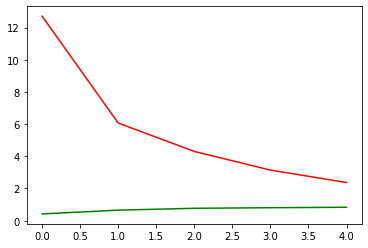

In [50]:
plt.plot(r.history['accuracy'], c='g')
plt.plot(r.history['loss'], c='r')
plt.show()